In [27]:
import os
import sys
sys.path.append('../')
import numpy as np
import json
import matplotlib.pyplot as plt
from utils.utils_plot import get_label, get_color

%matplotlib inline

In [28]:
# methods = {'No_Deconv':('--', 1, 4.5), #.o
#            'FPFS':('-', 1, 4.5),#^
#         #    'ngmix':('-', 1, 4.5),
#            'Richard-Lucy(10)':('-', 0.7, 2.5), 'Richard-Lucy(20)':('-', 0.8, 3.5), # D
#            'Richard-Lucy(30)':('-', 0.9, 4.5), 'Richard-Lucy(50)':('-', 1, 5), 
#           #  'Richard-Lucy(100):'--D',
#            'Unrolled_ADMM(1)':('-', 0.7, 2.5), 'Unrolled_ADMM(2)':('-', 0.8, 3.5), # *
#            'Unrolled_ADMM(4)':('-', 0.9, 4.5), 'Unrolled_ADMM(8)':('-', 1, 4.5)}
# snrs = [5, 10, 20, 40, 60, 80, 100, 150, 200]
# admmnet = [0.11445783132530121, 0.06361445783132531, 0.044337349397590375, 0.03421686746987952, 0.02746987951807231]
# tikhonet = [0.10963855421686748, 0.06313253012048195, 0.04506024096385543, 0.03542168674698795, 0.02987951807228917]

In [29]:
# fig, ax1 = plt.subplots(figsize=(14,9), facecolor='white')

# for method in methods:
#     g_errs, g_stds = [], []
#     results_file = os.path.join('../results', method, f'results.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results['20']['gt_shear'])
#     # results.pop('time')

#     for snr in snrs:
#         rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#         g_errs.append(np.mean(rec_err[:,2]))
#         g_stds.append(np.std(rec_err[:,2]))
#     color = 'xkcd:blue' if 'ADMM' in method else ('xkcd:green' if 'Richard-Lucy' in method else ('xkcd:red' if method=='FPFS' else 'black'))
#     markersize = 11.7 if 'ADMM' in method else (6.5 if 'Richard-Lucy' in method else (9 if method == 'Wiener' else 7))
#     if methods[method][1] == 1:
#         label = 'Unrolled ADMM' if 'ADMM' in method else ('Richardson-Lucy' if 'Richard-Lucy' in method else ('No Deconv' if 'No' in method else 'Fourier Division'))
#         ax1.plot(snrs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1], markersize=markersize)
#     else:
#         ax1.plot(snrs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1], markersize=markersize)
#     if method == 'Unrolled_ADMM(8)':
#         print(100*(1-g_errs[-3]/admmnet[-1]))
#         print(100*(1-g_errs[-7]/tikhonet[1]))

# ax1.plot(snrs[2:7], admmnet, '-', color='xkcd:purple', linewidth=5, label='ADMMNet')
# ax1.plot(snrs[2:7], tikhonet, '-', color='xkcd:orange', linewidth=5, label='Tikhonet')

# ax1.set_yscale('log', base=10)
# ax1.set_ylim([0.025,0.65])
# ax1.set_yticks([0.03,0.04,0.05,0.07,0.1,0.15,0.2,0.3,0.4,0.5,0.6])
# ax1.set_yticklabels(['0.03','0.04','0.05','0.07','0.10','0.15','0.20','0.30','0.40','0.50','0.60'])
# # ax1.set_ylim(0.025,0.45)
# # ax1.set_yticks([0.03,0.05,0.07,0.1,0.2,0.3,0.4])
# # ax1.set_yticklabels(['0.03','0.05','0.07','0.1','0.2','0.3','0.4'])
# # ax1.set_ylim(0.,0.2)
# ax1.set_ylabel('Ellipticity Error', fontsize=24)

# ax1.set_xlim([4.7, 210])
# ax1.set_xscale('log')
# ax1.set_xticks([5,10,20,50,100,200])
# ax1.set_xticklabels(['5','10','20','50','100','200'])
# ax1.set_xlabel('SNR', fontsize=24)

# plt.legend(fontsize=20)
# plt.tick_params(labelsize=18)
# plt.title('Ellipticity Errors of Different Deconvolution Methods', fontsize=24.5)
# # plt.savefig('err_snr.eps', bbox_inches='tight')
# # plt.savefig('err_snr.jpg', bbox_inches='tight')

In [30]:
methods = {
           'No_Deconv':('--', 1, 4.5), #.o
           'FPFS':('-',1, 4.5),#^
         #   'ngmix':('-', 1, 4.5),
        #    'Wiener':('-', 1, 4.5),
           'Richard-Lucy(10)':('-', 0.7, 2.5), 
           'Richard-Lucy(20)':('-', 0.8, 3.5), # D
           'Richard-Lucy(30)':('-', 0.9, 4.5), 'Richard-Lucy(50)':('-', 1, 5), 
          #  'Richard-Lucy(100):'--D',
           'Tikhonet':('-', 1, 4.5),
           'ShapeNet':('-', 1, 4.5),
        #    'Tikhonet_Laplacian':('-.', 0.7, 4.5),
         #   'Unrolled_ADMM(2)':('-', 0.8, 2.5), 
         #   'Unrolled_ADMM(4)':('-', 0.9, 3.5), # *
        #    'Unrolled_ADMM(6)':('-', 0.9, 4.5), 
         #   'Unrolled_ADMM(8)':('-', 1, 4.5),
           'Unrolled_ADMM_Gaussian(2)':('-', 0.7, 2.5), 
            'Unrolled_ADMM_Gaussian(4)':('-', 0.8, 3.5), 
         #   'Unrolled_ADMM_Gaussian(6)':('-', 0.9, 4.5), 
           'Unrolled_ADMM_Gaussian(8)':('-', 1, 4.5)
           }
snrs = [20, 40, 60, 80, 100, 150, 200, 300]
admmnet = [0.11445783132530121, 0.06361445783132531, 0.044337349397590375, 0.03421686746987952, 0.02746987951807231]
tikhonet = [0.10963855421686748, 0.06313253012048195, 0.04506024096385543, 0.03542168674698795, 0.02987951807228917]

FileNotFoundError: [Errno 2] No such file or directory: '../results4/ngmix/results.json'

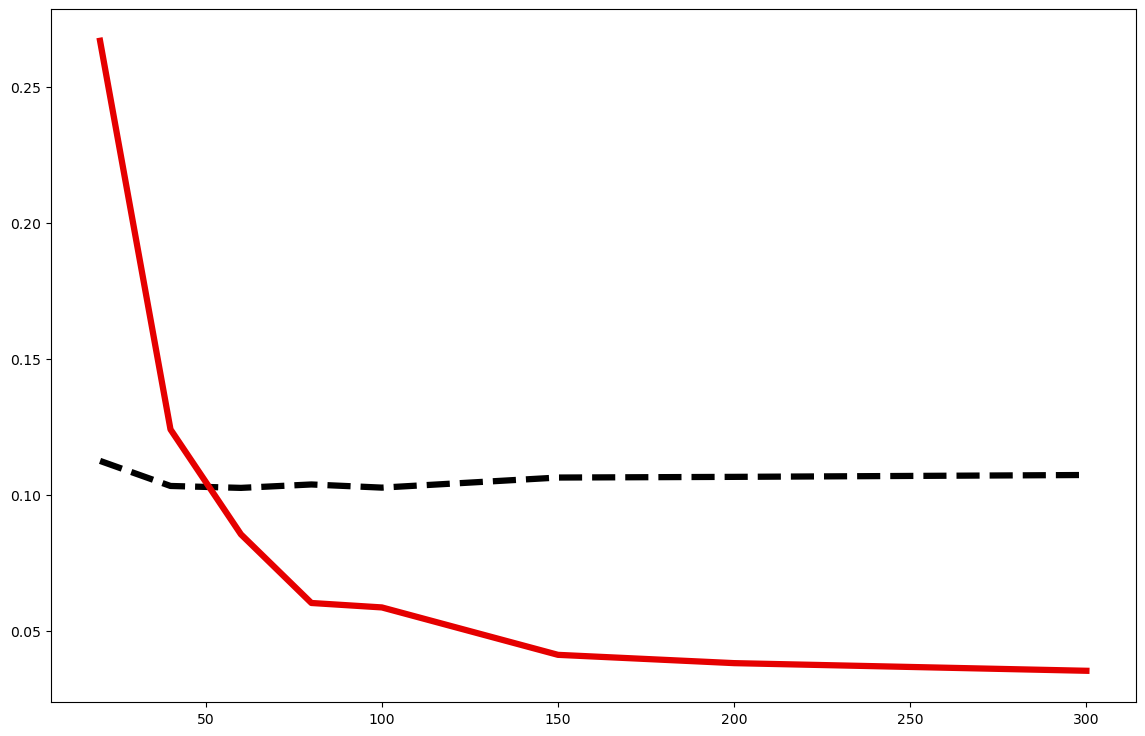

In [31]:
fig, ax1 = plt.subplots(figsize=(14,9), facecolor='white')

for method in methods:
    g_errs, g_stds = [], []
    results_path = '../results4/'
    results_file = os.path.join(results_path, method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)

    for snr in snrs:
        gt_shear = np.array(results[str(snr)]['gt_shear'])
        rec_shear = np.array(results[str(snr)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear)
        rec_err = np.minimum(rec_err, np.ones_like(rec_err))
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
    color = get_color(method)
    if methods[method][1] == 1:
        label = get_label(method)
        ax1.plot(snrs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1])
    else:
        ax1.plot(snrs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1])

# ax1.plot(snrs[0:5], admmnet, '-', color='xkcd:purple', linewidth=5, label='ADMMNet')
# ax1.plot(snrs[0:5], tikhonet, '-', color='xkcd:orange', linewidth=5, label='Tikhonet')

ax1.set_yscale('log', base=10)
ax1.set_ylim(0.02,0.3)
ax1.set_yticks([0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.15,0.2,0.3])
ax1.set_yticklabels(['0.03','0.04','0.05','0.06','0.07','0.08','0.10','0.15','0.20','0.30'])
ax1.set_ylabel('Ellipticity Error', fontsize=24)

ax1.set_xlim([19, 312])
ax1.set_xscale('log')
ax1.set_xticks([20,40,60,100,150,200,300])
ax1.set_xticklabels(['20','40','60','100','150','200','300'])
ax1.set_xlabel('SNR', fontsize=24)

plt.legend(fontsize=20)
plt.tick_params(labelsize=18)
plt.title('Ellipticity Errors of Different Deconvolution Methods', fontsize=24.5)
# plt.savefig('err_snr.eps', bbox_inches='tight')
# plt.savefig('err_snr.jpg', bbox_inches='tight')